In [3]:
import pandas as pd
import talib
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
#import seaborn as sns
#from seaborn import sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

mydata=pd.read_csv('fundamentals.csv')
mydata.set_index('Unnamed: 0')
mydata2= pd.read_csv('prices.csv')
mydata2

mydata2['datetime'] = pd.to_datetime(mydata2['date'])
mydata2 = mydata2.set_index('datetime')
mydata2.drop(['date'], axis=1, inplace=True)
mydata2.info()
mydata2.describe()


mydata2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


,symbol,open,close,low,high,volume
datetime,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0


In [4]:
mydata2['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [5]:
abt= mydata2[mydata2['symbol']=='ABT']

In [6]:
googl=mydata2[mydata2['symbol']=='GOOGL']
abt

,symbol,open,close,low,high,volume
datetime,,,,,,
2010-01-04,ABT,54.189953,54.459951,53.919951,54.559954,10829000.0
2010-01-05,ABT,54.469953,54.019953,53.749951,54.469953,10562100.0
2010-01-06,ABT,53.939950,54.319953,53.849954,54.389950,11401400.0
2010-01-07,ABT,54.309951,54.769952,54.069951,54.779950,12857200.0
2010-01-08,ABT,54.759951,55.049952,54.679952,55.249950,12148600.0
2010-01-11,ABT,55.299951,55.329952,55.069952,55.479952,10947200.0
2010-01-12,ABT,55.199952,55.169951,55.029953,55.549949,10939300.0
2010-01-13,ABT,54.859953,55.289953,54.849951,55.539951,10538900.0
2010-01-14,ABT,55.219952,55.349952,54.999951,55.619950,8982400.0


UsageError: Line magic function `%matplolib` not found.


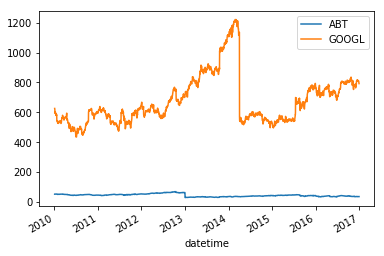

In [7]:
abt['close'].plot(label='ABT', legend=True)
googl['close'].plot(label='GOOGL', legend=True)
%matplolib inline

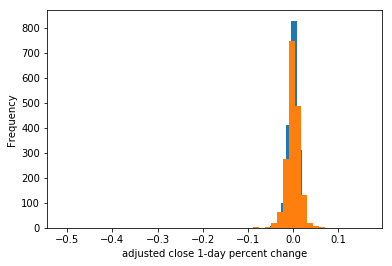

In [8]:
abt['close'].pct_change().plot.hist(bins=50)
googl['close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

<bound method DataFrame.corr of             5d_close_pct  5d_close_future_pct
datetime                                     
2010-01-04           NaN                  NaN
2010-01-05           NaN                  NaN
2010-01-06           NaN                  NaN
2010-01-07           NaN                  NaN
2010-01-08           NaN                  NaN
2010-01-11           NaN                  NaN
2010-01-12           NaN                  NaN
2010-01-13           NaN                  NaN
2010-01-14           NaN                  NaN
2010-01-15           NaN                  NaN
2010-01-19           NaN                  NaN
2010-01-20           NaN                  NaN
2010-01-21           NaN                  NaN
2010-01-22           NaN                  NaN
2010-01-25           NaN                  NaN
2010-01-26           NaN                  NaN
2010-01-27           NaN                  NaN
2010-01-28           NaN                  NaN
2010-01-29           NaN                  NaN
20

/Users/armenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/armenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/armenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

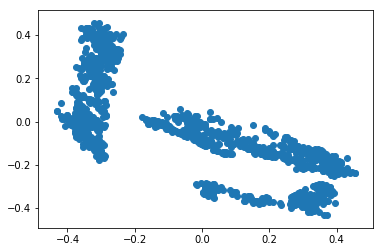

In [9]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
abt['5d_future_close'] = abt['close'].shift(-500)
abt['5d_close_future_pct'] = abt['5d_future_close'].pct_change(500)
abt['5d_close_pct'] = abt['close'].pct_change(500)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = abt[['5d_close_pct', '5d_close_future_pct']].corr
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(abt['5d_close_pct'], abt['5d_close_future_pct'])
plt.show()

<bound method DataFrame.corr of             5d_close_pct  5d_close_future_pct
datetime                                     
2010-01-04           NaN                  NaN
2010-01-05           NaN                  NaN
2010-01-06           NaN                  NaN
2010-01-07           NaN                  NaN
2010-01-08           NaN                  NaN
2010-01-11     -0.040909            -0.022442
2010-01-12     -0.053703            -0.017054
2010-01-13     -0.034804            -0.007001
2010-01-14     -0.007154            -0.067543
2010-01-15     -0.036577            -0.068966
2010-01-19     -0.022442            -0.076920
2010-01-20     -0.017054            -0.066005
2010-01-21     -0.007001            -0.083519
2010-01-22     -0.067543            -0.036490
2010-01-25     -0.068966            -0.012926
2010-01-26     -0.076920            -0.020833
2010-01-27     -0.066005            -0.002361
2010-01-28     -0.083519            -0.014056
2010-01-29     -0.036490             0.002548
20

/Users/armenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/armenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/armenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

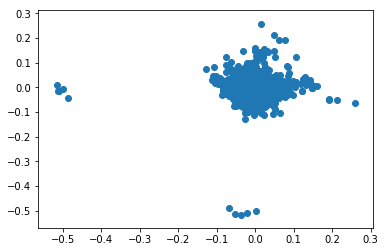

In [10]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
googl['5d_future_close'] = googl['close'].shift(-5)
googl['5d_close_future_pct'] = googl['5d_future_close'].pct_change(5)
googl['5d_close_pct'] = googl['close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = googl[['5d_close_pct', '5d_close_future_pct']].corr
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(googl['5d_close_pct'], googl['5d_close_future_pct'])
plt.show()

In [11]:


feature_names = ['5d_close_pct'] # a list of the feature names for later
    # Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
timeperiodlist=[14,30,50,200]
for n in timeperiodlist:

    # Create the moving average indicator and divide by Adj_Close
    abt['ma' + str(n)] = talib.SMA(abt['close'].values,
                                  timeperiod=n) / abt['close']
    # Create the RSI indicator
    abt['rsi' + str(n)] = talib.RSI(abt['close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names +['ma' + str(n), 'rsi' + str(n)]

print(feature_names)



['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


/Users/armenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/armenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [12]:
# Drop all na values
abt = abt.dropna()
abt


,symbol,open,close,low,high,volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
datetime,,,,,,,,,,,,,,,,,
2011-12-27,ABT,55.819951,56.229951,55.819951,56.339952,7303200.0,38.439999,-0.316379,0.032501,0.976385,66.955344,0.964046,59.767982,0.959033,56.951560,0.923701,52.460058
2011-12-28,ABT,55.999949,55.829949,55.769950,56.369949,8365700.0,38.189999,-0.315959,0.033506,0.984826,62.025892,0.971903,57.973900,0.967261,55.974509,0.931051,52.211042
2011-12-29,ABT,55.809950,56.329950,55.809950,56.389949,9254600.0,38.349998,-0.319190,0.037003,0.978811,65.450053,0.964359,59.544214,0.960057,56.917261,0.923641,52.494331
2011-12-30,ABT,56.069950,56.229951,56.069950,56.439950,8582300.0,38.369999,-0.317623,0.026657,0.982660,64.203151,0.967532,59.087430,0.962824,56.669609,0.926081,52.431857
2012-01-03,ABT,56.579948,56.719950,56.059952,56.839949,17693200.0,38.410000,-0.322813,0.030336,0.977257,67.473157,0.961119,60.618809,0.955448,57.592218,0.918858,52.709025
2012-01-04,ABT,56.729948,56.499950,56.229951,56.839949,13370100.0,38.330002,-0.321592,0.021146,0.983780,64.619011,0.966619,59.582955,0.960103,57.035834,0.923185,52.570803
2012-01-05,ABT,56.509951,56.369949,56.189952,56.589950,13119400.0,38.230000,-0.321802,0.021751,0.988761,62.925148,0.970977,58.967002,0.963353,56.705515,0.926060,52.489059
2012-01-06,ABT,56.489952,55.859951,55.799952,56.509951,11986200.0,38.639999,-0.308270,0.010309,0.999028,56.651298,0.981734,56.592726,0.973176,55.420663,0.935219,52.169222
2012-01-09,ABT,55.999949,55.849949,55.539951,56.039952,10789400.0,39.150002,-0.299015,0.009033,1.000435,56.532254,0.983999,56.546534,0.974138,55.395545,0.936080,52.162957


In [13]:
# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = abt[feature_names]
targets = abt['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = abt[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct      ma14     rsi14  \
5d_close_future_pct             1.000000     -0.797009  0.187642 -0.413459   
5d_close_pct                   -0.797009      1.000000 -0.079663  0.187737   
ma14                            0.187642     -0.079663  1.000000 -0.529113   
rsi14                          -0.413459      0.187737 -0.529113  1.000000   
ma30                            0.264449     -0.110800  0.853685 -0.673841   
rsi30                          -0.589172      0.288148 -0.474077  0.894460   
ma50                            0.333994     -0.134770  0.709059 -0.721370   
rsi50                          -0.709956      0.372582 -0.411031  0.770422   
ma200                           0.693454     -0.331906  0.390184 -0.587815   
rsi200                         -0.946006      0.706482 -0.258543  0.517541   

                         ma30     rsi30      ma50     rsi50     ma200  \
5d_close_future_pct  0.264449 -0.589172  0.333994 -0.709956  0.69345

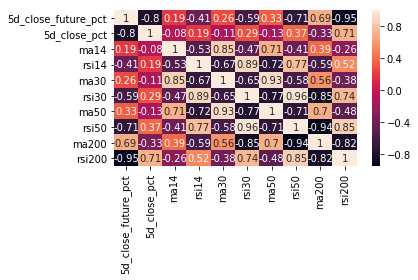

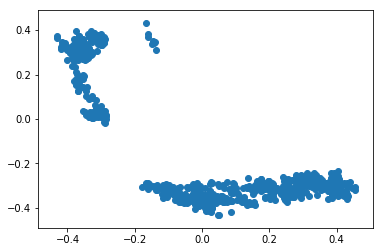

In [14]:
# Plot heatmap of correlation matrix
import seaborn as sns
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(abt['5d_close_future_pct'], abt['5d_close_pct' ])
plt.show()

In [15]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 *targets.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(762, 10) (647, 10) (115, 10)


In [16]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.962
Model:                             OLS   Adj. R-squared:                  0.962
Method:                  Least Squares   F-statistic:                     1803.
Date:                 Sun, 01 Sep 2019   Prob (F-statistic):               0.00
Time:                         21:13:49   Log-Likelihood:                 933.09
No. Observations:                  647   AIC:                            -1846.
Df Residuals:                      637   BIC:                            -1801.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8129      0.115    

/Users/armenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/armenio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


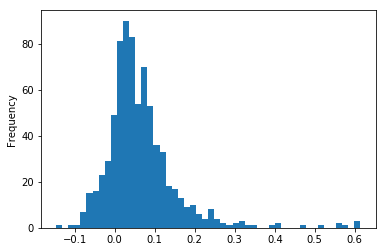

In [17]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change

targets = abt['5d_close_future_pct']
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)

abt['Adj_Volume_1d_change'] = abt['volume'].pct_change()
one_day_change = abt['Adj_Volume_1d_change'].values
abt['Adj_Volume_1d_change_SMA'] = talib.SMA(one_day_change,
                        timeperiod=10)

# Plot histogram of volume % change data
abt['Adj_Volume_1d_change_SMA'].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [18]:
#Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(abt.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original dataframe index for merging
days_of_week.index = abt.index

# Join the dataframe with the days of week dataframe
abt = pd.concat([abt, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
abt.dropna(inplace=True)  # drop missing values in-place

print(abt.head())

           symbol       open      close        low       high      volume  \
datetime                                                                    
2012-01-11    ABT  55.649952  55.419949  55.159953  55.659950  13866100.0   
2012-01-12    ABT  55.649952  55.159953  55.119949  55.879950  15528700.0   
2012-01-13    ABT  55.029953  55.429951  54.939952  55.539951  14115800.0   
2012-01-17    ABT  55.909952  55.709951  55.699949  56.239949  15592700.0   
2012-01-18    ABT  55.439953  55.359950  55.139953  55.779952  14803600.0   

            5d_future_close  5d_close_future_pct  5d_close_pct      ma14  \
datetime                                                                   
2012-01-11        39.200001            -0.292673     -0.013879  1.011187   
2012-01-12        39.270000            -0.288070     -0.019203  1.015591   
2012-01-13        39.570000            -0.286126     -0.002340  1.010361   
2012-01-17        39.110001            -0.297971      0.022014  1.004885   
2012

In [19]:
from sklearn.tree import DecisionTreeRegressor



# Create a decision tree regression model with default arguments

decision_tree = DecisionTreeRegressor(max_depth=5)



# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9914590477499924
-0.6416755052788592


In [20]:
# Loop through a few different max depths and check the performance
for d in [3,5,10,20,50,100]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features, train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.977022922408244
-0.36980570197133456 

max_depth= 5
0.9914590477499924
-0.6416755052788592 

max_depth= 10
0.9994733694159131
-0.8770967764150839 

max_depth= 20
0.9999999071136604
-0.5460136633557668 

max_depth= 50
0.9999999255369122
-0.6375045705644062 

max_depth= 100
0.9999999255369122
-0.8257400554509456 



In [21]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(features, targets)

# Look at the R^2 scores on train and test
#print(rfr.score(train_features, train_targets))
#print(rfr.score(test_features, test_targets))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
from sklearn.model_selection import ParameterGrid


train_size = int(0.85 *targets.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features':[4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features,train_targets)
    test_scores.append(rfr.score(test_features,test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

(762, 10) (647, 10) (115, 10)
0.19055468967950284 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


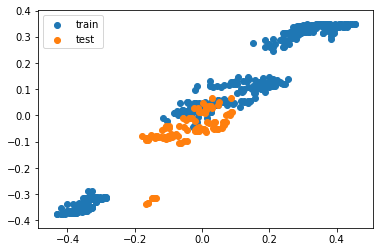

In [23]:

# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

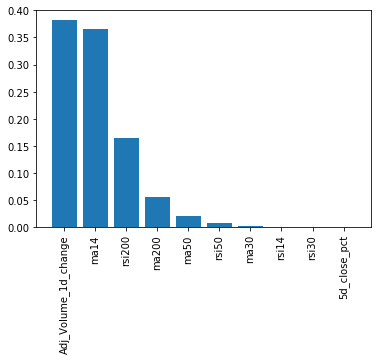

In [24]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features, train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features, test_targets))

0.9653727337607699
0.24051463116109614


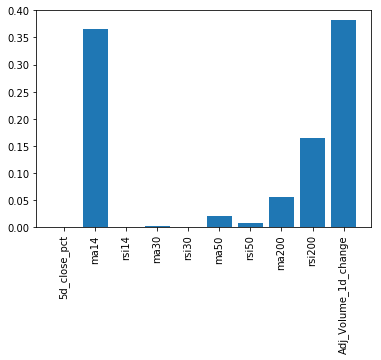

In [26]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(features.shape[1])

# Create tick labels 
labels = np.array(feature_names)[sorted_index]

plt.bar(sorted_index, importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

In [27]:
print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4']


In [28]:
print(feature_names[:-4])

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']


In [29]:
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

In [30]:
print(train_features)


            const  5d_close_pct      ma14      rsi14      ma30      rsi30
datetime                                                                 
2011-12-27    1.0      0.032501  0.976385  66.955344  0.964046  59.767982
2011-12-28    1.0      0.033506  0.984826  62.025892  0.971903  57.973900
2011-12-29    1.0      0.037003  0.978811  65.450053  0.964359  59.544214
2011-12-30    1.0      0.026657  0.982660  64.203151  0.967532  59.087430
2012-01-03    1.0      0.030336  0.977257  67.473157  0.961119  60.618809
2012-01-04    1.0      0.021146  0.983780  64.619011  0.966619  59.582955
2012-01-05    1.0      0.021751  0.988761  62.925148  0.970977  58.967002
2012-01-06    1.0      0.010309  0.999028  56.651298  0.981734  56.592726
2012-01-09    1.0      0.009033  1.000435  56.532254  0.983999  56.546534
2012-01-10    1.0      0.011173  0.998040  58.947231  0.981851  57.479818
2012-01-11    1.0     -0.013879  1.011187  50.869911  0.995411  54.279283
2012-01-12    1.0     -0.019203  1.015

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_train_features = sc.fit_transform(train_features)
scaled_test_features = sc.transform(test_features)

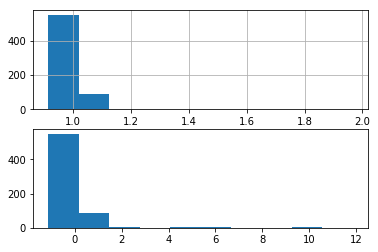

In [32]:
# create figure and list containing axes
f, ax = plt.subplots(nrows=2, ncols=1)
# plot histograms of before and after scaling
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2,13):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features,train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.9922190958921958
-2.6700484635621757

n_neighbors = 3
train, test scores
0.9856065560929691
-2.3236569164253282

n_neighbors = 4
train, test scores
0.9822575570957239
-2.285230804592979

n_neighbors = 5
train, test scores
0.9784202363995941
-2.302564294924884

n_neighbors = 6
train, test scores
0.9747921575139492
-2.3090680269726764

n_neighbors = 7
train, test scores
0.9706195475686602
-2.3194460737573372

n_neighbors = 8
train, test scores
0.9668591356575467
-2.422658009841377

n_neighbors = 9
train, test scores
0.9649531091115994
-2.4263195154459405

n_neighbors = 10
train, test scores
0.963088406068932
-2.566132562703395

n_neighbors = 11
train, test scores
0.9616508160272684
-2.6245637719336123

n_neighbors = 12
train, test scores
0.9592533406651691
-2.588691905099156



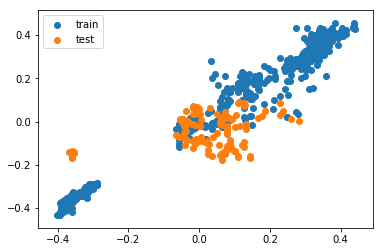

In [36]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(5)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features) 
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

In [37]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/Users/armenio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/armenio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/armenio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/armenio/anaconda3/lib/python3.7/site-packag

In [45]:
model_1 = Sequential()
model_1.add(Dense(50,
                input_dim=scaled_train_features.shape[1],
                activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(1, activation='linear'))

In [46]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(scaled_train_features, train_targets, epochs=50)

Epoch 1/50
647/647 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 2/50
647/647 [==============================] - 0s 51us/step - loss: 0.0035
Epoch 3/50
647/647 [==============================] - 0s 53us/step - loss: 0.0034
Epoch 4/50
647/647 [==============================] - 0s 55us/step - loss: 0.0033
Epoch 5/50
647/647 [==============================] - 0s 54us/step - loss: 0.0033
Epoch 6/50
647/647 [==============================] - 0s 50us/step - loss: 0.0033
Epoch 7/50
647/647 [==============================] - 0s 59us/step - loss: 0.0038
Epoch 8/50
647/647 [==============================] - 0s 53us/step - loss: 0.0039
Epoch 9/50
647/647 [==============================] - 0s 51us/step - loss: 0.0035
Epoch 10/50
647/647 [==============================] - 0s 54us/step - loss: 0.0035
Epoch 11/50
647/647 [==============================] - 0s 59us/step - loss: 0.0031
Epoch 12/50
647/647 [==============================] - 0s 57us/step - loss: 0.0032
Epoch 13/50
64

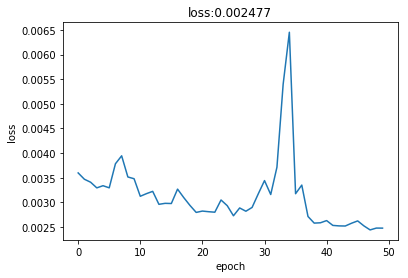

In [47]:
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [44]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend()
plt.show()

NameError: name 'model_1' is not defined

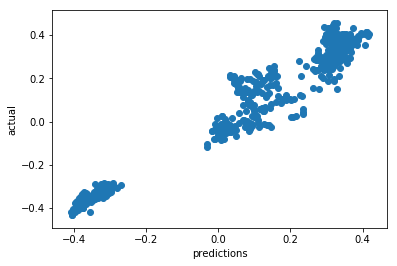

In [42]:
# plot predictions vs actual
plt.scatter(train_preds, train_targets)
plt.xlabel('predictions')
plt.ylabel('actual')
plt.show()